In [1]:
import sys
sys.path.append('../python')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from machine_learning import *
from notebook_network_size import find_best_network_size_notebook, try_best_network_sizes
from train_single_network import train_single_network
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/usr/lib64/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = []
with open('../SOD_MC_DATA.dat', 'r') as inputfile:
    for l in inputfile:
        data.append([float(x) for x in l.split(',')])
data = np.array(data)

parameters = data[:,:6]
samples = data[:,6:]

In [4]:
epochs = 500000
network = [10, 10, 10, 10, 10,1]

# Network sizes


In [5]:
func_names=['Q1', 'Q2', 'Q3']

for n, func_name in enumerate(func_names):
    display(HTML("<h1>%s</h1>"% func_name))
    try_best_network_sizes(parameters=parameters, 
                           samples=samples[:,n], 
                           base_title='Sod Shock MC %s' % func_name,
                          epochs=epochs)

Config 4 x 6 ([0 x 0] / [5 x 5])


KeyboardInterrupt: 

# Single network


Training took 1187.4568724632263 seconds


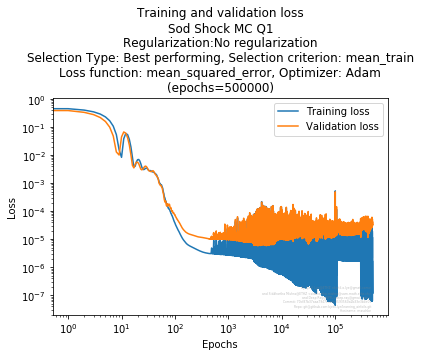


Training took 1274.1801493167877 seconds


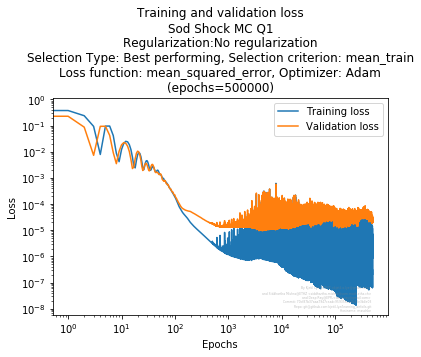


Training took 1332.0805866718292 seconds


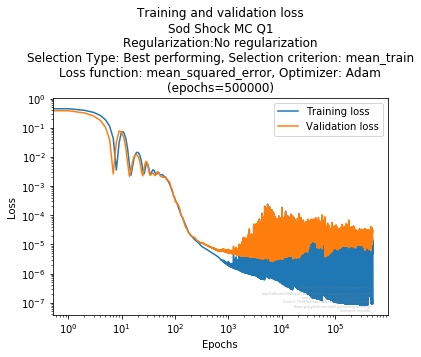

Best network index: 2
Total learning time took: 3837 s
Training took 1346.5615978240967 seconds


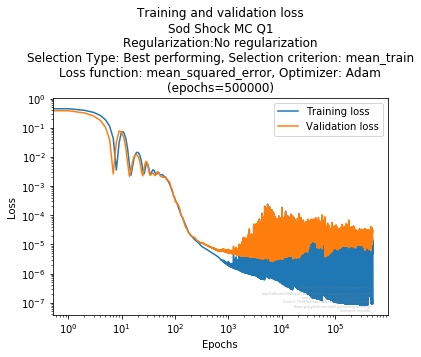

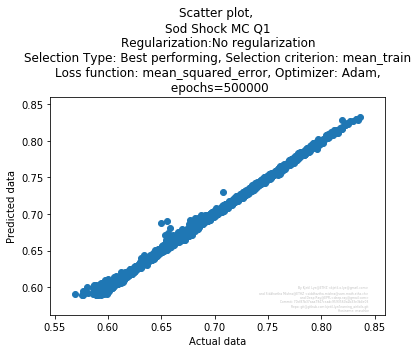

Number of parameters: 1149


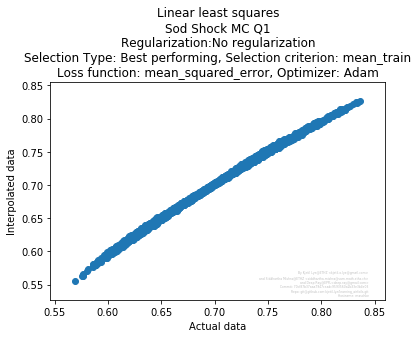

(2000,)
(2000, 6)


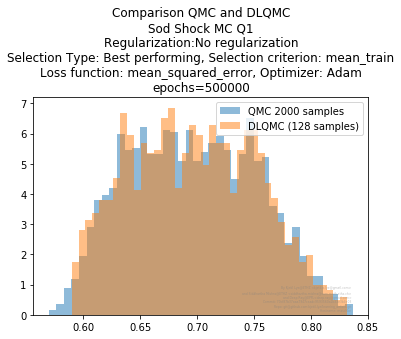

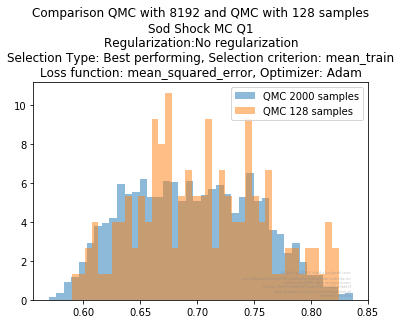

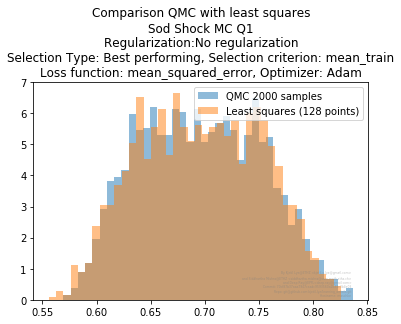

Memory usage: 969364
Memory usage: 969364


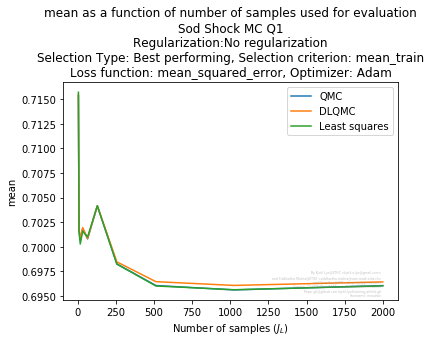

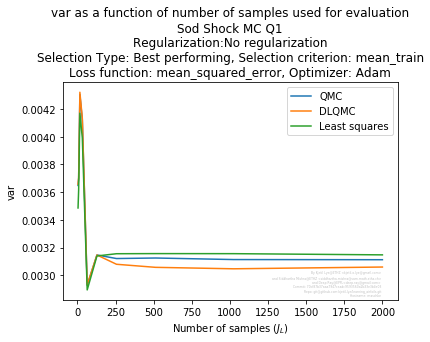

Memory usage: 969364


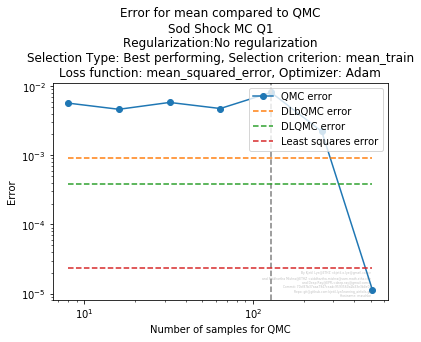

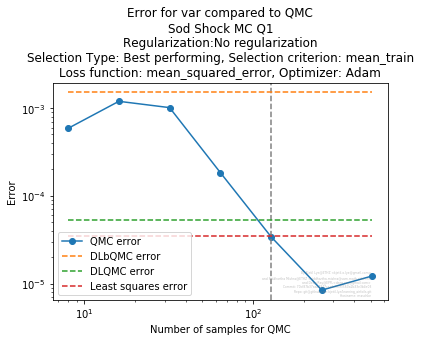

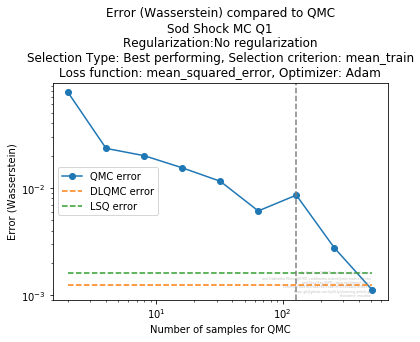

NameError: name 'json' is not defined

In [8]:
func_names=['Q1', 'Q2', 'Q3']


for n, func_name in enumerate(func_names):
    display(HTML("<h1>%s</h1>"% func_name))
    train_single_network(parameters=parameters, 
                         samples=samples[:,n], 
                         base_title='Sod Shock MC %s' % func_name,
                         network = network,
                         epochs=epochs, 
                         large_integration_points = None)